In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
#reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#Using the formula to calculate b1 and b2
number = 0
denom = 0

for i in range(m):
    number += (X[i] - mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
b1 = number/denom
b0 = mean_y - (b1*mean_x)

#print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


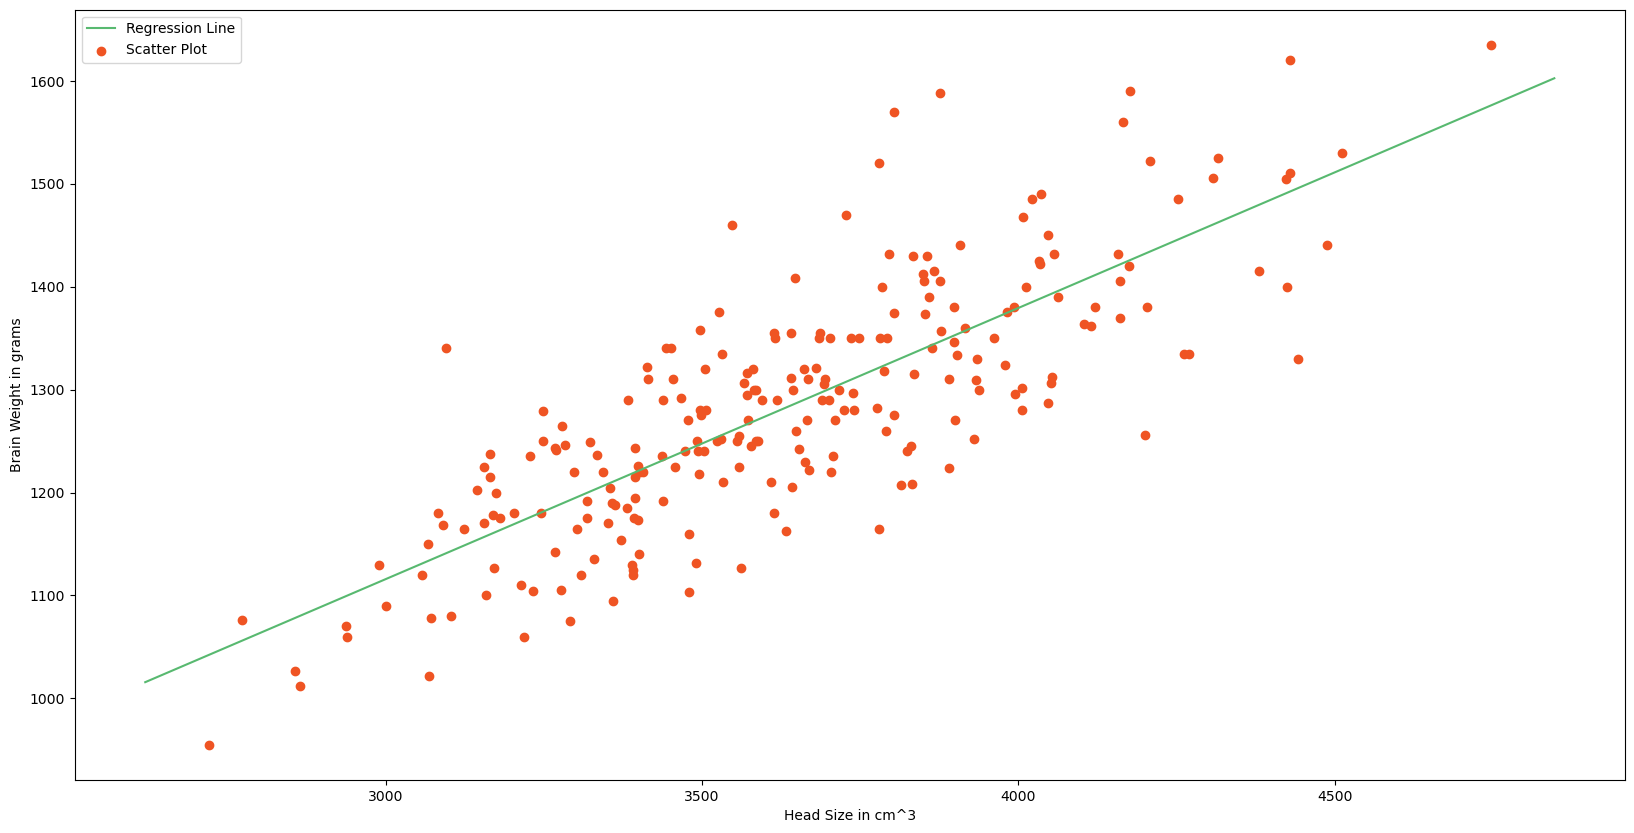

In [5]:
#plotting values and regression line

max_x = np.max(X) +100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y= b0 +b1 * x

#plotting line
plt.plot(x,y, color='#58b970', label='Regression Line')
#plotting scatter points
plt.scatter(X,Y,c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [6]:
#calculating r^2 value

ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [8]:
#Using SciKit Learn Library for Linear Regression applications
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m,1))
#Creating Model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred =  reg.predict(X)

#Calculating R^2 score

r2_score = reg.score(X,Y)

print(r2)

0.6393117199570003


In [ ]:
# hence we are getting same r2 score using the scikit library too
